In [7]:
import pandas as pd
import numpy as np

In [8]:
###The dataset contains the following information of 30000 customers: 
#1. DEFAULT - Default payment next month (Yes=1, No=0) 
#2. LIMIT_BAL - Amount of the given credit (INR)
#3. SEX - Gender (1 = male; 2 = female) 
#4. EDUCATION - Education (1 = graduate school; 2 = university; 3 = high school; 4 = others) 
#5. MARRIAGE - (1 = married; 2 = single; 3 = others)
#6. AGE - (year)
#7. PAST_PAY - History of repayment status 
#- PAST_PAY1 = the repayment status in September 2005 
#- PAST_PAY2 = the repayment status in August 2005 
#- PAST_PAY6 = the repayment status in April 2005 
#- The measurement scale for the repayment status is 
#8.  >i.  -1 = pay duly <br> 
#9. ii.  1 = payment delay for one month<br> 
#10. iii. 2 = payment delay for two months <br> 
#11. iv.  8 = payment delay for eight months<br> 
#v.   9 = payment delay for nine months and above <br> 

In [9]:
data=pd.read_csv("C:/Users/Chandana/Desktop/JLC/Capstone Project for Advanced Analytics/Project 1/credit_card.csv")

In [10]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
data.dtypes

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [12]:
data.shape

(30000, 25)

In [13]:
print( data.describe().T)

             count           mean            std       min       25%  \
ID         30000.0   15000.500000    8660.398374       1.0   7500.75   
LIMIT_BAL  30000.0  167484.322667  129747.661567   10000.0  50000.00   
SEX        30000.0       1.603733       0.489129       1.0      1.00   
EDUCATION  30000.0       1.853133       0.790349       0.0      1.00   
MARRIAGE   30000.0       1.551867       0.521970       0.0      1.00   
AGE        30000.0      35.485500       9.217904      21.0     28.00   
PAY_1      30000.0      -0.016700       1.123802      -2.0     -1.00   
PAY_2      30000.0      -0.133767       1.197186      -2.0     -1.00   
PAY_3      30000.0      -0.166200       1.196868      -2.0     -1.00   
PAY_4      30000.0      -0.220667       1.169139      -2.0     -1.00   
PAY_5      30000.0      -0.266200       1.133187      -2.0     -1.00   
PAY_6      30000.0      -0.291100       1.149988      -2.0     -1.00   
BILL_AMT1  30000.0   51223.330900   73635.860576 -165580.0   355

In [6]:
data["DEFAULT"].unique()

array([1, 0], dtype=int64)

In [14]:
data["AGE"].unique()

array([24, 26, 34, 37, 57, 29, 23, 28, 35, 51, 41, 30, 49, 39, 40, 27, 47,
       33, 32, 54, 58, 22, 25, 31, 46, 42, 43, 45, 56, 44, 53, 38, 63, 36,
       52, 48, 55, 60, 50, 75, 61, 73, 59, 21, 67, 66, 62, 70, 72, 64, 65,
       71, 69, 68, 79, 74], dtype=int64)

In [15]:
data["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [16]:
#EDUCATION 1 = graduate school; 2 = university; 3 = high school; 4 = others

In [17]:
data["SEX"].unique() # 1 = male; 2 = female

array([2, 1], dtype=int64)

In [18]:
data["MARRIAGE"].unique()   #(1 = married; 2 = single; 3 = others)

array([1, 2, 3, 0], dtype=int64)

In [19]:
data[["DEFAULT","EDUCATION","SEX"]].head()

,DEFAULT,EDUCATION,SEX
0,1,2,2
1,1,2,2
2,0,2,2
3,0,2,2
4,0,2,1


In [20]:
data.groupby("DEFAULT").agg({"AGE":['min','max','mean']})

AGE               
        min max       mean
DEFAULT                   
0        21  79  35.417266
1        21  75  35.725738

In [21]:
data.boxplot(column='EDUCATION',by='DEFAULT')

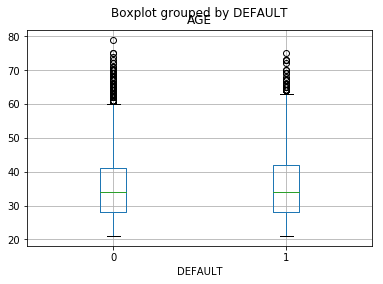

In [22]:
data.boxplot(column='AGE',by='DEFAULT')

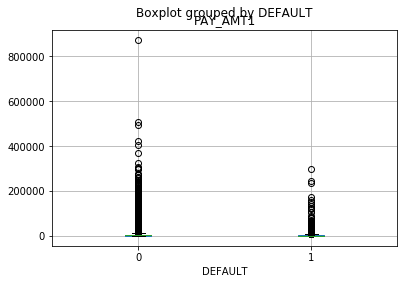

In [23]:
data.boxplot(column='PAY_AMT1',by='DEFAULT')

In [24]:
'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'

('PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6')

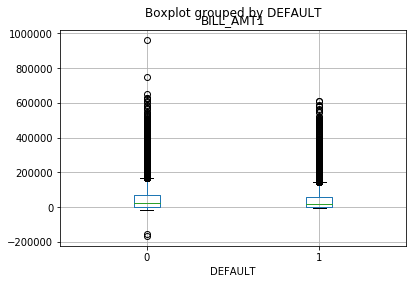

In [25]:
data.boxplot(column='BILL_AMT1',by='DEFAULT')

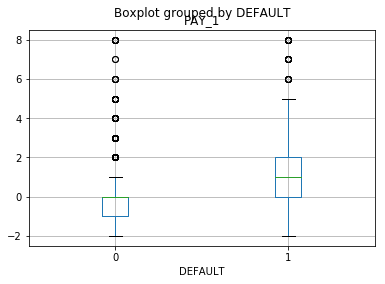

In [26]:
data.boxplot(column='PAY_1',by='DEFAULT')

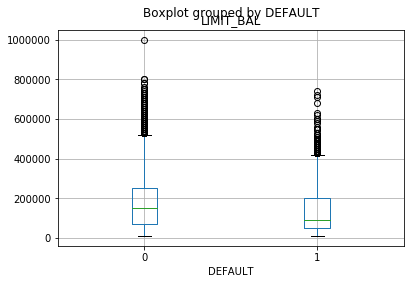

In [27]:
data.boxplot(column='LIMIT_BAL',by='DEFAULT')

In [28]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [30]:
data.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_1,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

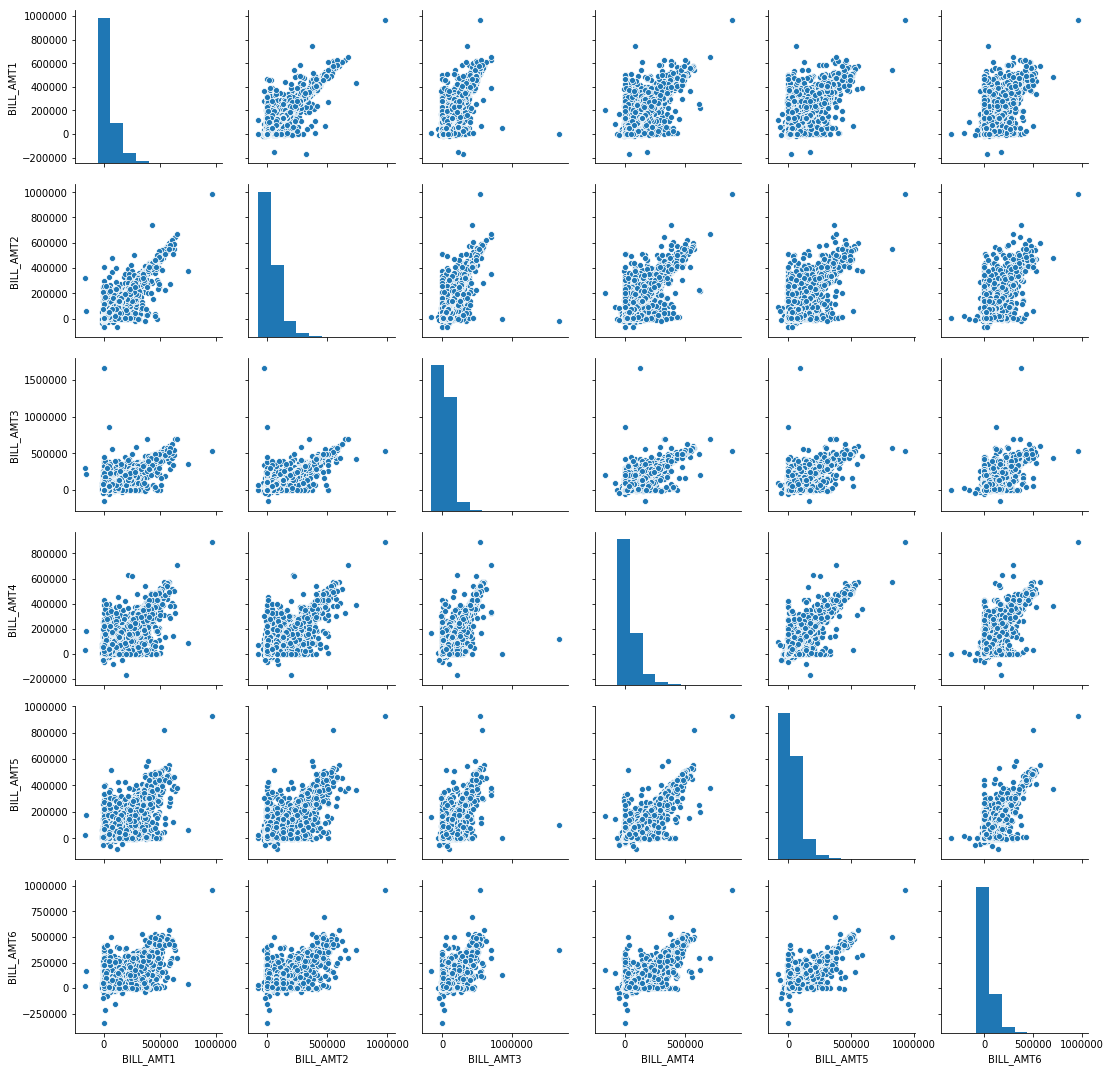

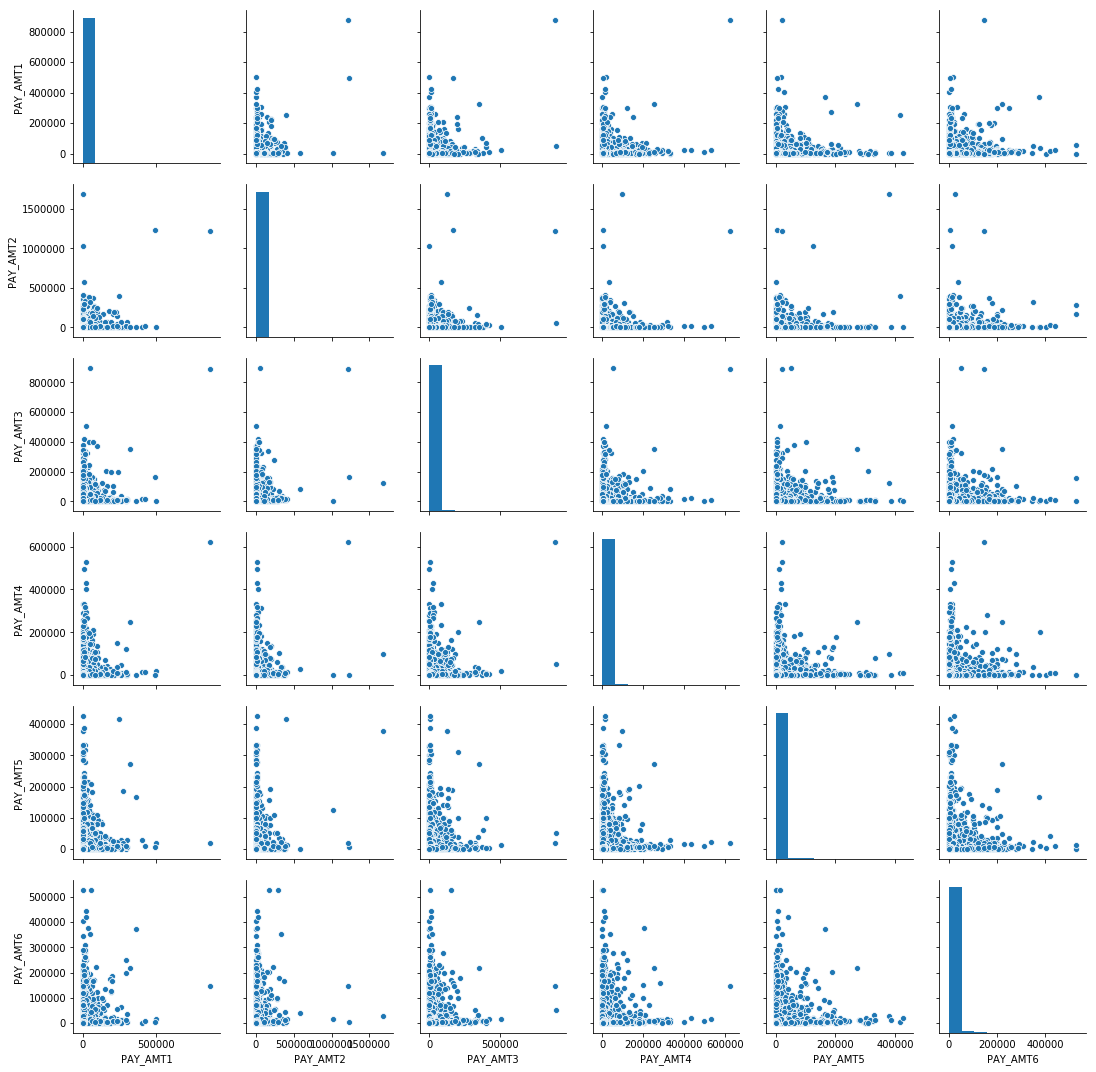

In [32]:
# plot columns with similar names to check the correlation

sns.pairplot(data, vars=data.columns[12:18], kind='scatter')
sns.pairplot(data, vars=data.columns[18:24])

In [33]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [34]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [35]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [24]:
data['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
71       3
72       3
75       3
74       1
79       1
Name: AGE, dtype: int64

In [36]:
data['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [37]:
data.groupby(['DEFAULT','SEX']).size()

DEFAULT  SEX
0        1       9015
         2      14349
1        1       2873
         2       3763
dtype: int64

In [38]:
data.groupby(['DEFAULT','MARRIAGE']).size()

DEFAULT  MARRIAGE
0        0              49
         1           10453
         2           12623
         3             239
1        0               5
         1            3206
         2            3341
         3              84
dtype: int64

In [39]:
data.groupby(['DEFAULT','EDUCATION']).size()

DEFAULT  EDUCATION
0        0               14
         1             8549
         2            10700
         3             3680
         4              116
         5              262
         6               43
1        1             2036
         2             3330
         3             1237
         4                7
         5               18
         6                8
dtype: int64

In [40]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT'],
      dtype='object')

In [30]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [100]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
# manually standardize numeric columns

col_to_norm = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

data[col_to_norm]=data[col_to_norm].apply(lambda x: (x-np.mean(x))/np.std(x))

In [44]:
# create dummies for categorical features.
# add 2 to all the values because OneHotEncoder can only handle non-negative values

col_pay = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
data[col_pay] = data[col_pay].apply(lambda x: x+2)

X = data.iloc[:, 0:24]
y = data.DEFAULT


In [45]:
# train test split

from sklearn.model_selection  import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=data.DEFAULT, random_state=1)

In [3]:
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.feature_selection import RFECV

In [ ]:
#Stochastic Gradient Descent

In [4]:
 #try using stochastic gradient descent with logistic loss function
# specify lasso regularization to select features and address multicollinearity issues
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal')
# use grid search to optimize parameters
search_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
estimator  = GridSearchCV(sgd, search_params)
model = estimator.fit(X_train, y_train)

print ('Best Params: ', model.best_params_)
print ('Best Score: ', model.best_score_)
y_pred = model.predict(X_test)

NameError: name 'X_train' is not defined

In [148]:
# Check the accuracy score
y_pred = model.predict(X_test)
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal', alpha=0.001)
print ('accuracy score on training set: ', cross_val_score(sgd, X_train, y_train, n_jobs=-1).mean())
print ('accuracy score on testing set: ', accuracy_score(sgd_pred, y_test))

C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


accuracy score on training set:  0.5744973945378476


NameError: name 'sgd_pred' is not defined

In [135]:
# create classification report
print (classification_report(y_test, y_pred, target_names=['not default', 'default']))

              precision    recall  f1-score   support

 not default       0.78      1.00      0.88      7009
     default       0.00      0.00      0.00      1991

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000



C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [137]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['default', 'not default'], columns=['predicted default', 'predicted not default'])
print (confusion)

             predicted default  predicted not default
default                      0                   1991
not default                  0                   7009


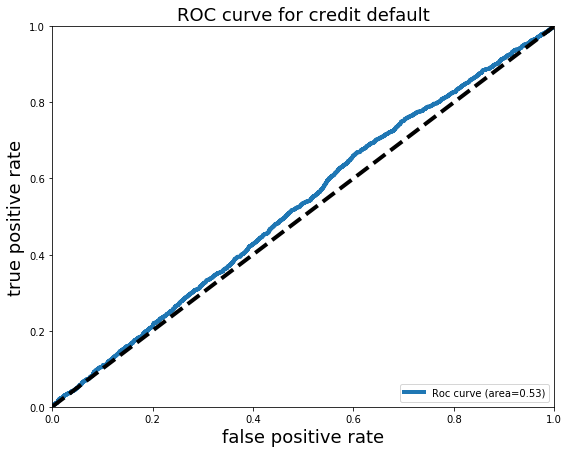

In [139]:
# plot roc curve and calculate auc
y_score = model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc=dict()
fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
roc_auc[1] = auc(fpr[1], tpr[1])

plt.figure(figsize=[9,7])
plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
plt.plot([1,0], [1,0], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('false positive rate', fontsize=18)
plt.ylabel('true positive rate', fontsize=18)
plt.title('ROC curve for credit default', fontsize=18)
plt.legend(loc='lower right')
plt.show()

In [140]:
# logistic regression with grid search
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
search_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
estimator = GridSearchCV(lr, search_params)
estimator.fit(X_train, y_train)
print ("Best Params:", estimator.best_params_)
print ("Best Score:", estimator.best_score_)

C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Params: {'C': 1, 'class_weight': None, 'penalty': 'l1'}
Best Score: 0.8081904761904762


In [143]:
# feature selection with the best model from grid search
lr = LogisticRegression(penalty='l1', C=1, solver='liblinear')
rfecv = RFECV(estimator=lr, scoring='accuracy')
model = rfecv.fit(X, y)
pred_y = model.predict(X_test)

C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinea

In [151]:
# print evaluation matrices
print (classification_report(y_test, pred_y, target_names=['not default', 'default']))

              precision    recall  f1-score   support

 not default       0.78      1.00      0.88      7009
     default       0.62      0.01      0.02      1991

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.70      0.50      0.45      9000
weighted avg       0.74      0.78      0.69      9000



In [152]:
conmat = np.array(confusion_matrix(y_test, pred_y, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['default', 'not default'], columns=['predicted default', 'predicted not default'])
print (confusion)

             predicted default  predicted not default
default                     21                   1970
not default                 13                   6996


In [153]:
y_score = model.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc=dict()
fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
roc_auc[1] = auc(fpr[1], tpr[1])

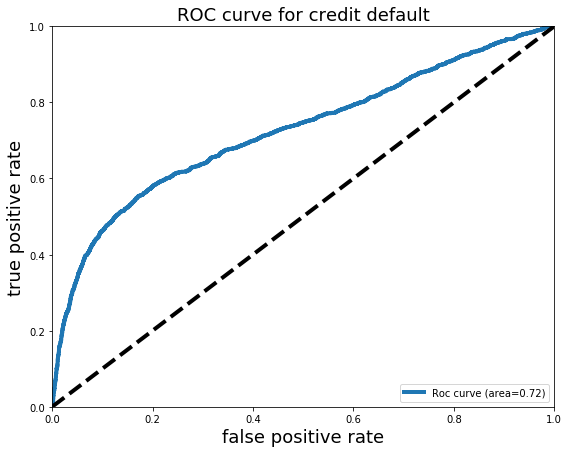

In [154]:
plt.figure(figsize=[9,7])
plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
plt.plot([1,0], [1,0], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('false positive rate', fontsize=18)
plt.ylabel('true positive rate', fontsize=18)
plt.title('ROC curve for credit default', fontsize=18)
plt.legend(loc='lower right')
plt.show()

In [158]:
# curious about how k nearest neighbors perform with binary problem
from sklearn.neighbors import KNeighborsClassifier
search_parameters = {'n_neighbors': [1, 3, 5, 10, 50], 'weights': ('uniform', 'distance'),
                     'algorithm': ('brute', 'auto'), 'p': [1,2]}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, search_parameters)
clf.fit(X_train, y_train)
print ('Best Parameters:', clf.best_params_)
print ('Best Score:', clf.best_score_)

C:\Users\Chandana\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Parameters: {'algorithm': 'brute', 'n_neighbors': 50, 'p': 2, 'weights': 'distance'}
Best Score: 0.7788571428571428


In [156]:
knnpred_y = clf.predict(X_test)
print (classification_report(y_test, knnpred_y, target_names=['not default', 'default']))

              precision    recall  f1-score   support

 not default       0.78      1.00      0.88      7009
     default       0.75      0.00      0.00      1991

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.76      0.50      0.44      9000
weighted avg       0.77      0.78      0.68      9000



In [157]:
conmat = np.array(confusion_matrix(y_test, knnpred_y, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['default', 'not default'], columns=['predicted default', 'predicted not default'])
print (confusion)

             predicted default  predicted not default
default                      3                   1988
not default                  1                   7008
